<div class="alert alert-success"><h1>Deep Learning with Python using Keras</h1></div>

Deep learning has revolutionized the field of machine learning, enabling significant advancements in areas such as computer vision, natural language processing, and speech recognition. In this tutorial, we'll embark on our deep learning journey by learning how to design and build a deep learning model using Keras, a user-friendly and high-level neural networks API, written in Python and capable of running on top of TensorFlow. Keras allows for easy and fast prototyping of deep learning models.

## Learning Objectives
By the end of this tutorial, you will:
+ Understand the basics of Keras.
+ Know how to load and preprocess data.
+ Know how to define a deep learning model in Keras.
+ Understand how to compile a Keras model.
+ Know how to train and save a model.

## Prerequisites
Before we begin, ensure you have:

+ Basic knowledge of Python programming (variables, functions, classes).
+ Familiarity with fundamental machine learning concepts (datasets, training/testing, overfitting).
+ A Python (version 3.x) environment with the `tensorflow`, `keras`, `numpy`, and `matplotlib` packages installed.

<div class="alert alert-success"><h2>1. Import the Libraries</h2></div>

To start, we'll import the necessary libraries that we'll use throughout this tutorial.

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

The libraries we imported are:
+ **numpy:** A fundamental package for scientific computing in Python, used for handling arrays and mathematical functions.
+ **tensorflow:** An open-source platform for machine learning developed by Google.
+ **keras:** A high-level API for building and training deep learning models, integrated within TensorFlow.
+ **layers:** A module in Keras containing various types of neural network layers.

To ensure reproducibility of my code, so you obtain the same results as my example, I will set a random initialization seed using the `keras.utils.set_random_seed()` function. This will make the weights and biases initialized during the training process deterministic, ensuring consistent results across different runs. However, in practice, setting a seed is not typically necessary.

In [2]:
keras.utils.set_random_seed(1234)

<div class="alert alert-success"><h2>2. Load the Data</h2></div>

For this tutorial, we'll use the **MNIST dataset**, a classic dataset in the machine learning community. It consists of 70,000 grayscale images of handwritten digits ranging from 0 to 9. Each image is 28x28 pixels, and the dataset is divided into 60,000 training images and 10,000 testing images. Our goal will be to develop a model that learns to correctly identify a handritten digit given the image.

Keras provides easy access to the MNIST dataset via its datasets module.

In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


The `keras.datasets.minist.load_data()` function returns four datasets:
+ **train_images:** A numpy array of training images.
+ **train_labels:** A numpy array of training labels.
+ **test_images:** A numpy array of testing images.
+ **test_labels:** A numpy array of testing labels.

Let's take a moment to understand the data we're working with. We start by getting the shape of the training and test sets.

In [4]:
print('Training data shape:', train_images.shape)
print('Testing data shape:', test_images.shape)

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


The output tells us that:
+ The training data consists of 60,000 images, each of size 28x28 pixels.
+ The test data consists of 10,000 images, each of size 28x28 pixels.

Visualizing some samples can provide further intuition about the dataset. Let's display the first 5 images in the training set along with their associated labels.

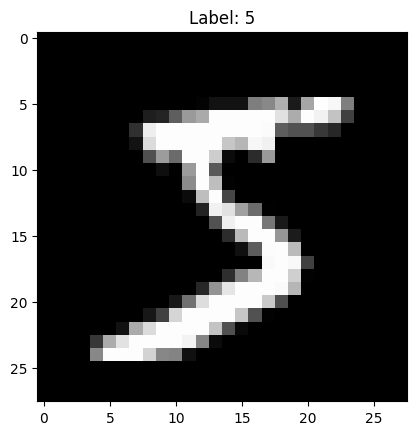

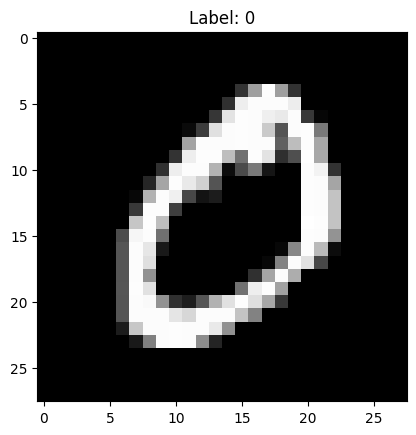

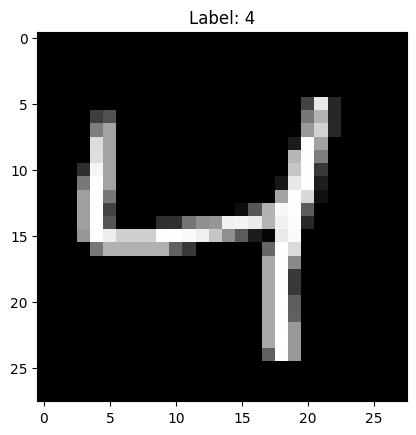

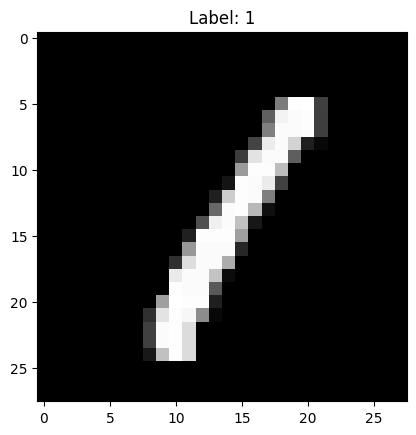

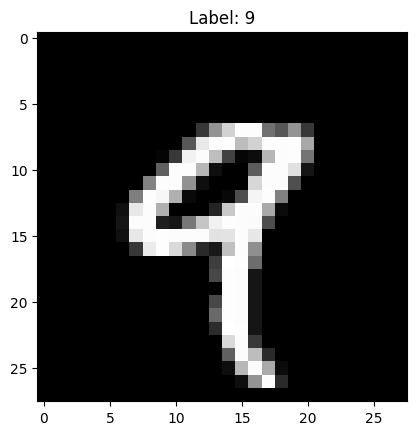

In [5]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.imshow(train_images[i], cmap = 'gray')
    plt.title(f'Label: {train_labels[i]}')
    plt.show()

<div class="alert alert-success"><h2>3. Preprocess the Data</h2></div>

Before feeding the data into our deep learning model, we need to preprocess it to ensure optimal performance. Neural networks in Keras expect the input data to be in a specific shape. We're going to build a simple feedforward neural network (also known as a multilayer perceptron). This type of network expects the incoming data as a vector.

This means we need to flatten the 28x28 images into vectors of size 784 (i.e. 28 $\times$ 28).

In [6]:
train_images = train_images.reshape(60000, 28 * 28)
test_images = test_images.reshape(10000, 28 * 28)

Let's get the shape of the training and test sets again.

In [7]:
print('Training data shape:', train_images.shape)
print('Testing data shape:', test_images.shape)

Training data shape: (60000, 784)
Testing data shape: (10000, 784)


Now, `train_images` and `test_images` have shapes (60000, 784) and (10000, 784), respectively.

Pixel values in images range from 0 to 255. Neural networks perform better when input values are scaled to a smaller range, typically between 0 and 1. To accommodate this, we convert the data type of the image pixels to float32 and normalize the values to fall within 0 and 1 by dividing them by 255.

In [8]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

The label values associated with each image are integers from 0 to 9. For multi-class classification, it's standard to convert these labels into one-hot encoded vectors. One-hot encoding involves representing categorical variables as binary vectors. For instance, label '0' becomes [1, 0, 0, 0, 0, 0, 0, 0, 0, 0] and label '9' becomes [0, 0, 0, 0, 0, 0, 0, 0, 0, 1].

In [9]:
num_classes = 10
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

Now, `train_labels` and `test_labels` are matrices of shape (60000, 10) and (10000, 10), respectively.

<div class="alert alert-success"><h2>4. Define the Model Architecture</h2></div>

A neural network's architecture defines how the data flows through the model, how layers are connected, and what operations are performed. To define the architecture of our model, we'll use the **Sequential API** in Keras, which allows us to build models layer by layer.

We start by initializing the Sequential model.

In [10]:
model = keras.Sequential()

Then we specify the shape of the input data. This represents the input layer.

In [11]:
model.add(keras.Input(shape = (784,)))

Next, we add two fully connected (or dense) layers - one with 512 neurons, and the other with 128 neurons. We use the Rectified Linear Unit (ReLU) activation function for both. Recall that the ReLU activation function introduces non-linearity into a model and helps with the vanishing gradient problem.

In [12]:
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(128, activation = 'relu'))

For this simple model, we'll limit the architecture to a two hidden layers and proceed directly to the output layer. In more complex models, we can add multiple hidden layers to capture intricate patterns in the data.

The ouput layer contains 10 neurons corresponding to the 10 classes (digits 0-9) and uses the softmax activation function to convert the raw score output of the model to probabilities.

In [13]:
model.add(layers.Dense(10, activation = 'softmax'))

Rather than adding each layer of the model one by one, we can also define the entire model at once as follows:

In [14]:
model = keras.Sequential([
    keras.Input(shape = (784,)),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(128, activation ='relu'),
    layers.Dense(10, activation = 'softmax')
])

We can view a summary of the model architecture by calling the `summary()` method of the model.

In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 468,874 (1.79 MB)

 Trainable params: 468,874 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

The output shows the total number of parameters (weights and biases in each layer) that will be trained for the model.

+ First Hidden Layer: 784 inputs $\times$ 512 neurons + 512 biases = 401,920 parameters.
+ Second Hidden Layer: 512 inputs $\times$ 128 neurons + 128 biases = 65,664 parameters.
+ Output Layer: 128 inputs $\times$ 10 neurons + 10 biases = 1,290 parameters.

A total of **468,874** weights and biases will be trained for the model.

Visually, the neural network we just defined can be represented in the following way:

<img src="https://github.com/sakshigorkhali/deep-learning-course/blob/main/nnet.jpg?raw=1" width="50%"/>